# Multivariate Regression

Regression is a method to analyze the relationship between the response variate and the explanatory variates in a dataset. It is popular in the field of quantitative finance, and helps financial managers to value assets and understand the relation between variables, such as commodity prices and stocks of businesses dealing in those commodities. 

The dataset consists of data on Melbourne's housing market, and was available on the Kaggle website. I have conducted a straightforward regression analysis to see which variables have an effect on house prices.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats
import statsmodels.api as sm

In [40]:
# There were a bunch of entries with house prices = 0, so I have excluded them from the study. 
hd = pd.read_csv("C:/Users/aleem/Documents/Quant finance/Excel files - online learning/Practice Datasets/Melbourne_housing_FULL.csv", 
                     header = 0)
hd = hd[hd["Price"] != 0]
hd = hd.dropna()
hd.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


(0, 5000000)

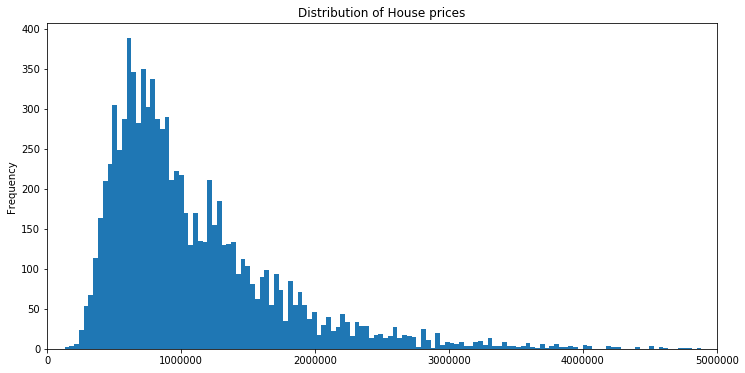

In [44]:
# Lets look at the distribution of house prices. The prices dont have a Normal distribution
# Graph has a wide right tail, showing it is positively skewed.
hd['Price'].plot.hist(bins = 250, figsize = (12,6), title = "Distribution of House prices").set_xlim([0, 5000000])

In [45]:
# Lets find the skewness and kurtosis of the prices. A Normal distribution has skewness = 0 and kurtosis = 3.
# These numbers show that prices are extreme and they are not Normal.
scipy.stats.skew(hd['Price']), scipy.stats.kurtosis(hd['Price'])

(2.4109895195909523, 11.036678550555788)

In [46]:
# I have filtered out data based on house prices under $3m.
# Otherwise the extreme returns would have had an effect on our results. 
hd = hd[hd['Price']<=300000]
hd["Price"].max()

300000.0

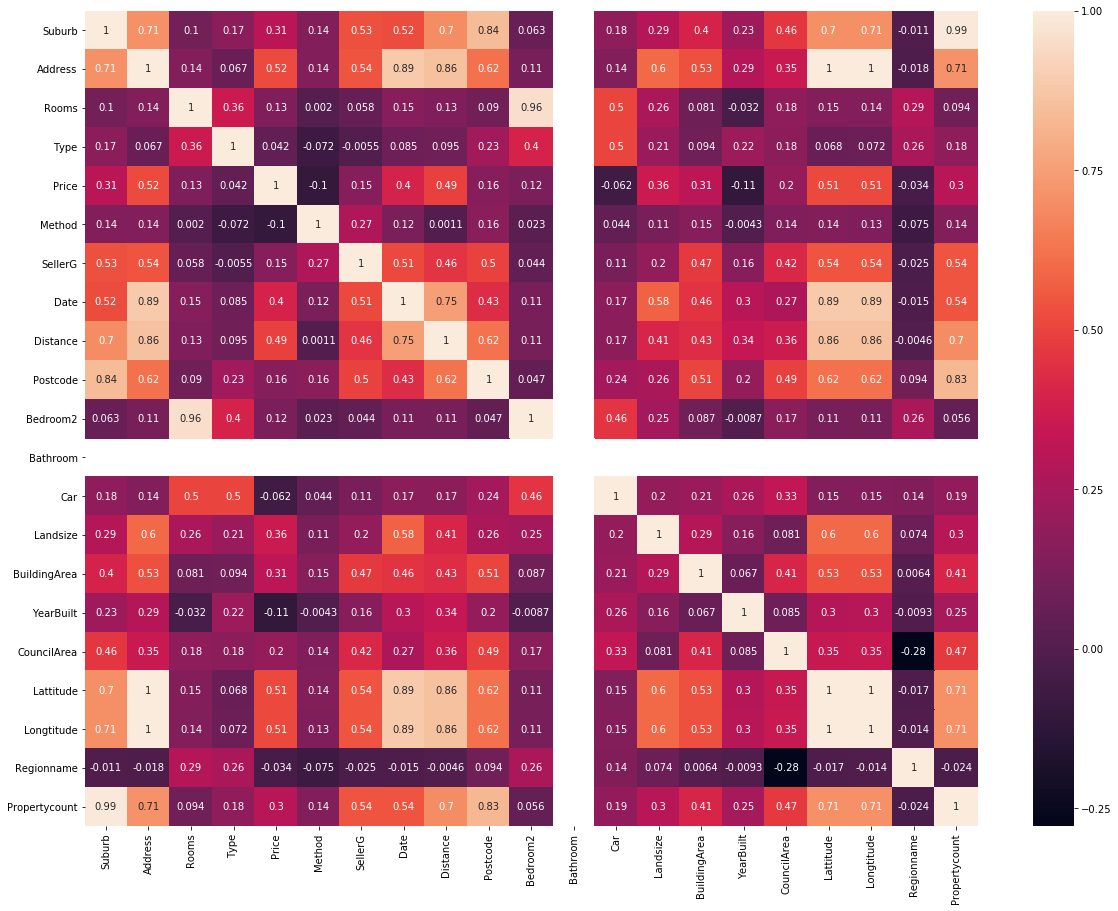

In [48]:
# I have found the correlation matrix for the variables. This will help us see how the variables are related to eachother.
# Variables highly correlated with the response variate (Price) are usually included in the regression model.
# Many of the variables were non-numeric so I had to factorize them in order to proceed.
# A heatmap will then make it easier for us to see the various relationships.
hd = hd.apply(lambda x: x.factorize()[0])
plt.subplots(figsize=(20,15))
sns.heatmap(hd.corr(), annot = True)

In [49]:
# If 2 explanatory variables are highly correlated to each other, then only one should be included in the model.
# This is because 2 highly correlated variables will have the same effect on the response variable.
# "Longitude", "Latitude", "Address" and "Suburb" are highly correlated with each other; I have only included "Address"
# "Rooms" and "Bedroom2" are highly correlated so I have included "Rooms" in the model
# I have also included "Type" to see if type of living (House, Townhouse or Unit) has an effect on prices.
# I was also interested to add the year the house was built and the land size to see the relationship.

X = hd[["Rooms", "Address", "Type", "Landsize", "YearBuilt"]]
Y = hd["Price"]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     7.556
Date:                Fri, 22 May 2020   Prob (F-statistic):           9.47e-06
Time:                        08:27:10   Log-Likelihood:                -279.18
No. Observations:                  78   AIC:                             570.4
Df Residuals:                      72   BIC:                             584.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6154      2.745      2.410      0.019       1.144      12.087
Rooms          0.2073      2.197      0.094      0.925      -4.172       4.587
Address        0.2693      0.059      4.550      0.000       0.151       0.387
Type           1.7907      3.589      0.499      0.619      -5.364       8.945
Landsize       0.0575      0.143      0.401      0.689      -0.228       0.343
YearBuilt     -0.5618      0.200     -2.804      0.006      -0.961      -0.162
==============================================================================
Omnibus:                        1.826   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.702
Skew:                          -0.258   Prob(JB):                        0.427
Kurtosis:                       2.492   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null hypothesis: No relationship between the response and explanatory variables.

Lets test at the 5% significance level. Based on this, we see that "Rooms", "Type" and "Landsize" dont have any effect on house prices since their p-values > 5%, therefore we fail to reject the null hypothesis.
"Address" and "YearBuilt" have p-values < 5% so there is very strong evidence against the null hypothesis. Hence, we reject the null hypothesis and can conclude that both are associated with a change in house prices, given all other other variables in the model

Finally, $R^2$=34.4% which is very low, showing the model is not very effective with the 5 explanatory variables included. $R^2$ shows the variation in the response variable explained by the model. The variables included in this dataset are not effective for an analysis. Usually, data scientists conduct multiple regressions to see exact relationships between different variables, but for the purpose of this analysis, I have conducted one.